In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
data = pd.read_csv("BostonHousing.csv")

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


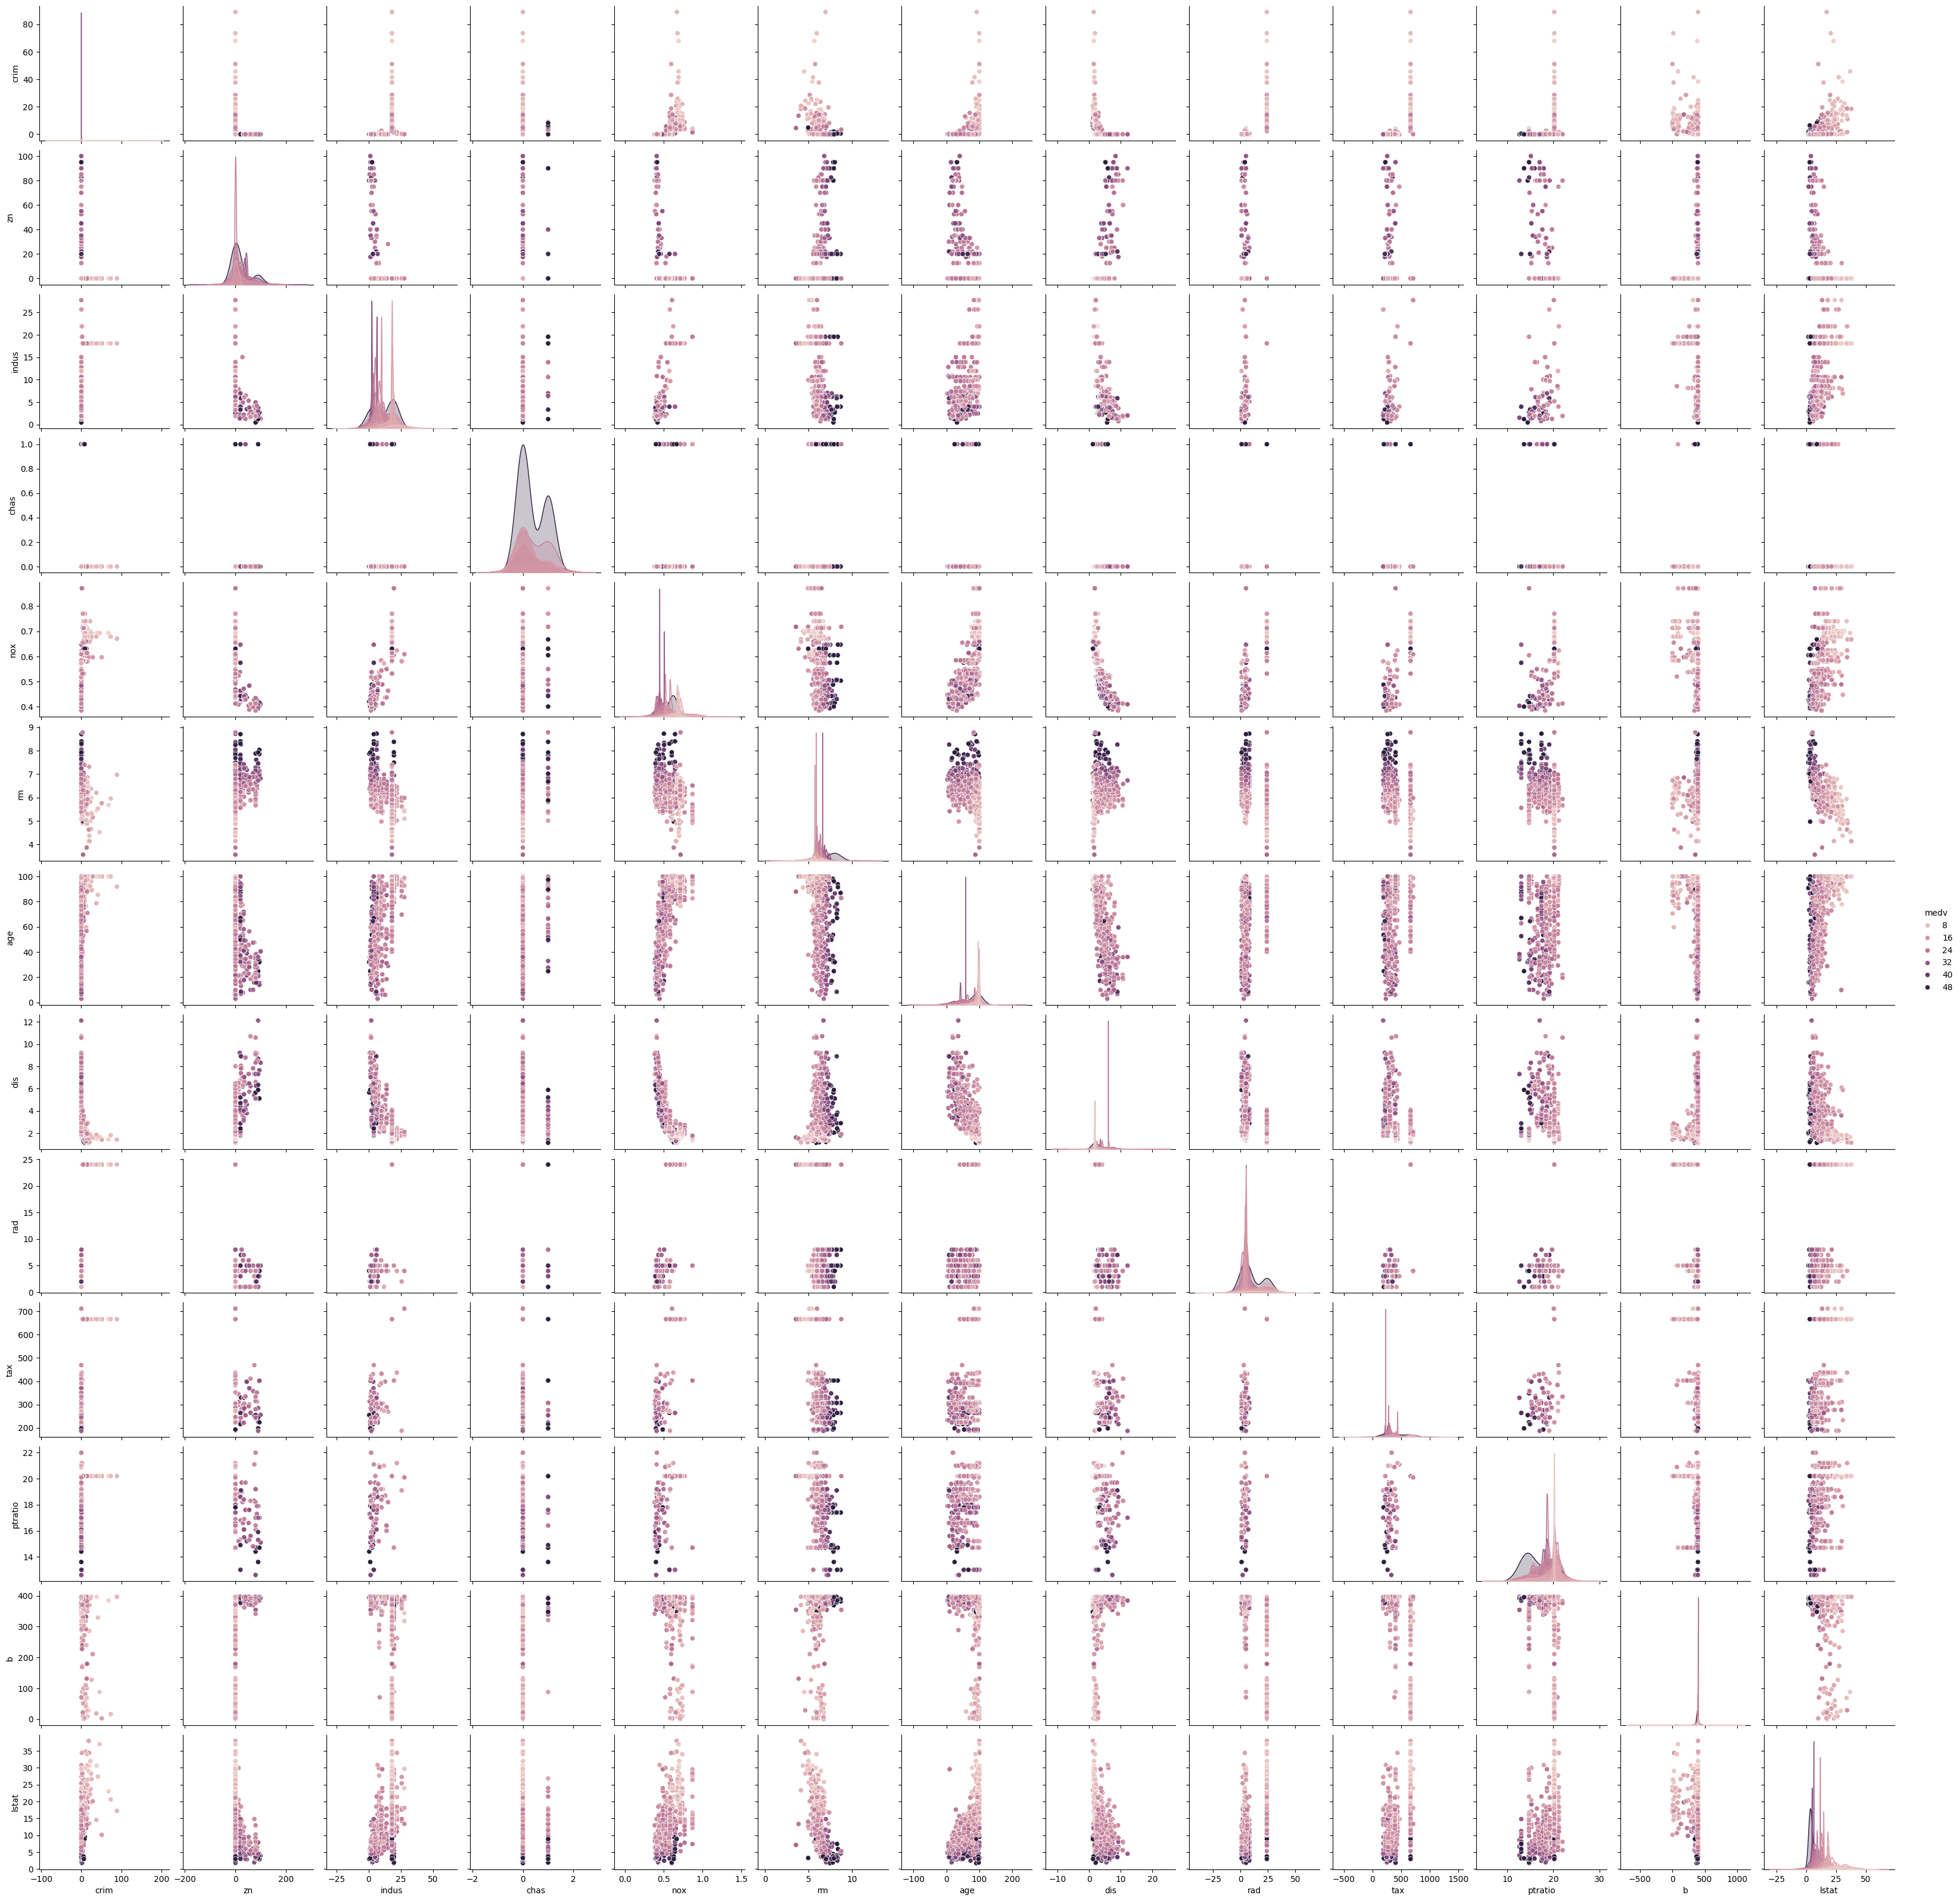

In [5]:
sns.pairplot(data=data, hue='medv')

In [169]:

# Select features and target variable
X = data[['lstat']]
y = data['medv']

In [170]:
# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [171]:
# Predict and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

In [172]:
# Calculate and print mean squared error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 38.48296722989415


In [173]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.5441462975864797

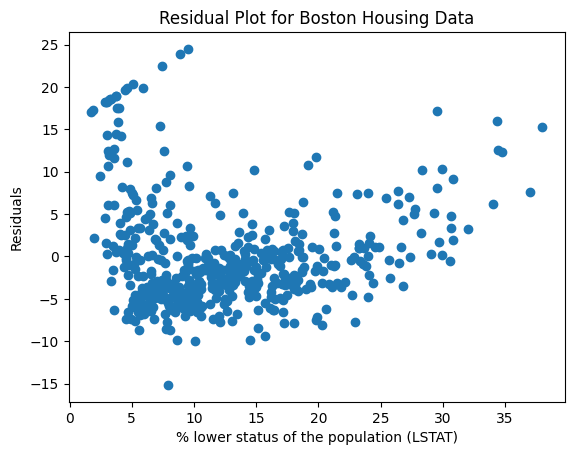

In [174]:
# Check for heteroskedasticity (visual inspection)
plt.scatter(X, residuals)
plt.xlabel('% lower status of the population (LSTAT)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Boston Housing Data')
plt.show()

In [175]:
# Formal test for heteroskedasticity (Breusch-Pagan test)
X_with_constant = sm.add_constant(X) 
bp_test = sm.stats.het_breuschpagan(residuals**2, X_with_constant)
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")

Breusch-Pagan Test p-value: 0.0004584129403609205


In [176]:
# Correcting for heteroskedasticity: Weighted Least Squares (WLS)
# Assuming variance is proportional to LSTAT (example)
weights = 1 / X['lstat'] 
wls_model = sm.WLS(y, X, weights=weights).fit()

# Predict and calculate residuals for WLS model
y_pred_wls = wls_model.predict(X)
residuals_wls = y - y_pred_wls

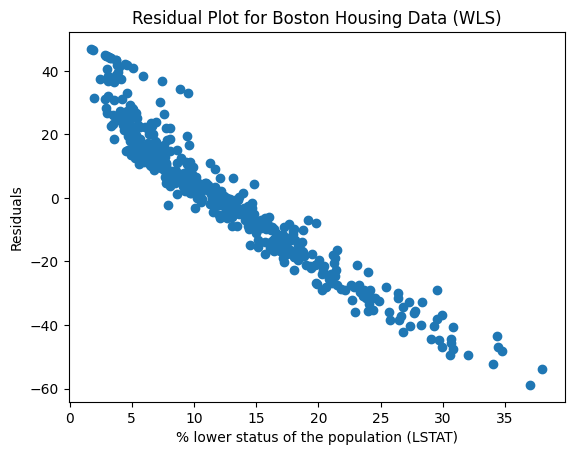

In [177]:
# Plot residuals after WLS
plt.scatter(X, residuals_wls)
plt.xlabel('% lower status of the population (LSTAT)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Boston Housing Data (WLS)')
plt.show()